In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv("Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
data.agg(["var","median","skew","kurtosis"])

,Taxable.Income,City.Population,Work.Experience
var,6.866930e+08,2.485030e+09,78.183570
median,5.507450e+04,1.064935e+05,15.000000
skew,3.001479e-02,1.250090e-01,0.018529
kurtosis,-1.199782e+00,-1.120154e+00,-1.167524


In [7]:
data.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [8]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

## EDA

YES    312
NO     288
Name: Undergrad, dtype: int64


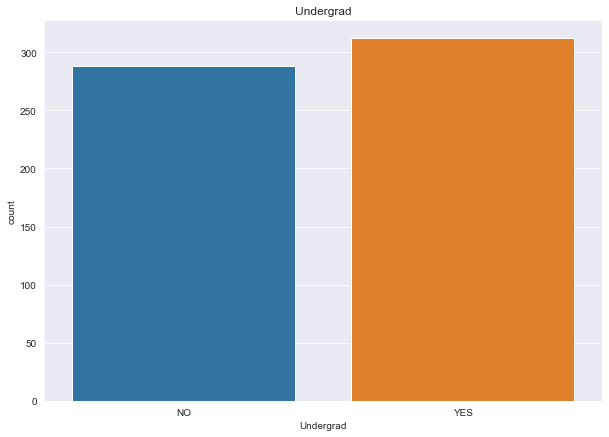

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64


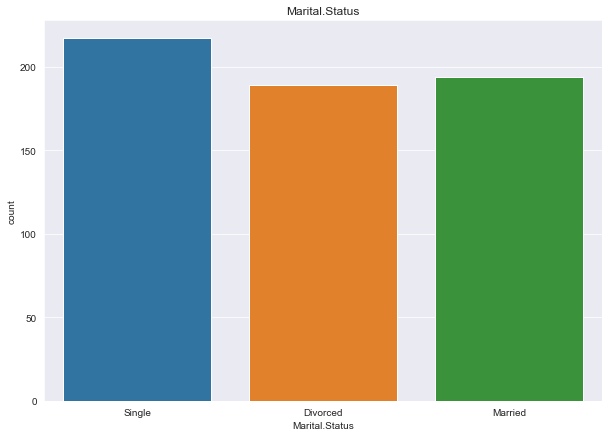

YES    302
NO     298
Name: Urban, dtype: int64


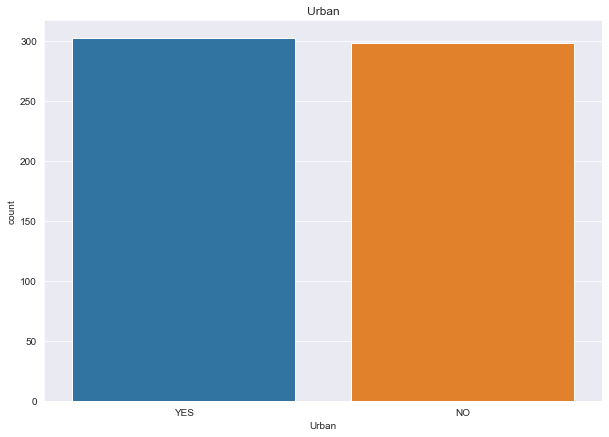

In [9]:
obj = data[["Undergrad","Marital.Status","Urban"]]

for i in obj:
    sns.set_style("darkgrid")
    plt.figure(figsize = (10,7))
    sns.countplot(obj[i])
    counts = obj[i].value_counts()
    plt.title(i)
    print(counts)
    plt.show()
    

## Data Preparing

### Problem Statement: taxable_income <= 30000 as "Risky" and others are "Good"

In [10]:
print(f"minimum_value : {data['Taxable.Income'].min()}\nmaximun_value : {data['Taxable.Income'].max()}")

minimum_value : 10003
maximun_value : 99619


In [11]:
data['Taxable.Income'] = pd.cut(x=data['Taxable.Income'],bins = [10002,30000,99620], labels=['Risky','Good'])
data['Taxable.Income']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [12]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    object  
 1   Marital.Status   600 non-null    object  
 2   Taxable.Income   600 non-null    category
 3   City.Population  600 non-null    int64   
 4   Work.Experience  600 non-null    int64   
 5   Urban            600 non-null    object  
dtypes: category(1), int64(2), object(3)
memory usage: 24.3+ KB


#### Countplot for newly generated Undergrad values

YES    312
NO     288
Name: Undergrad, dtype: int64


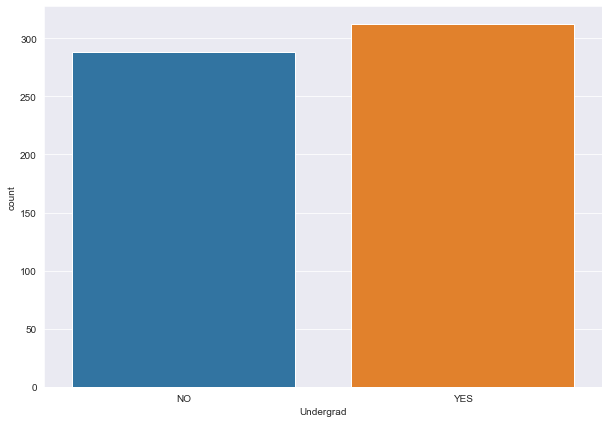

In [14]:
plt.figure(figsize = (10,7))
sns.countplot(data["Undergrad"])
print(data["Undergrad"].value_counts())
plt.show()

In [15]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [16]:
#encoding categorical data
le = preprocessing.LabelEncoder()
data['Undergrad'] = le.fit_transform(data['Undergrad'])
data['Taxable.Income'] = le.fit_transform(data['Taxable.Income'])
data['Marital.Status'] = le.fit_transform(data['Marital.Status'])
data['Urban'] = le.fit_transform(data['Urban'])
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [17]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [18]:
X = data[['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban']]
y = data[["Taxable.Income"]]

In [21]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [22]:
print(Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape)

(420, 5) (180, 5) (420, 1) (180, 1)


## Decision Tree

### Using Entropy Criteria

In [23]:
entropy_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
entropy_model.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

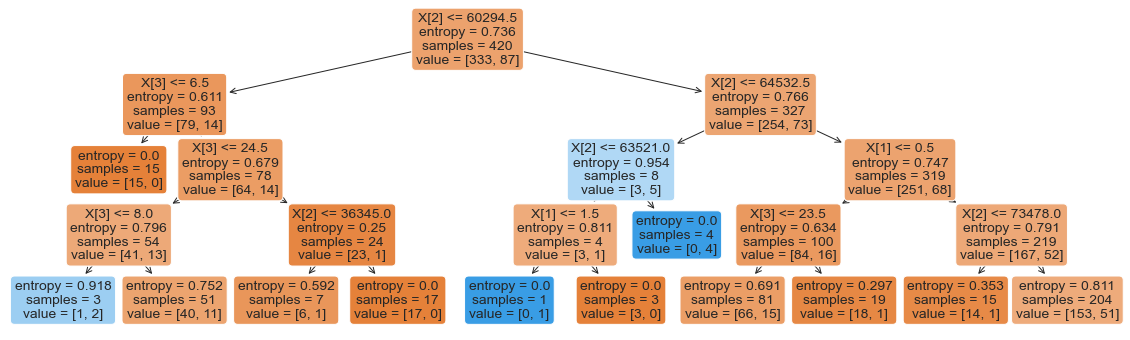

In [24]:
#plotting enropy model decision tree
plt.figure(figsize = (20,6))
from sklearn import tree
tree.plot_tree(entropy_model,filled = True,rounded = True)
plt.show()

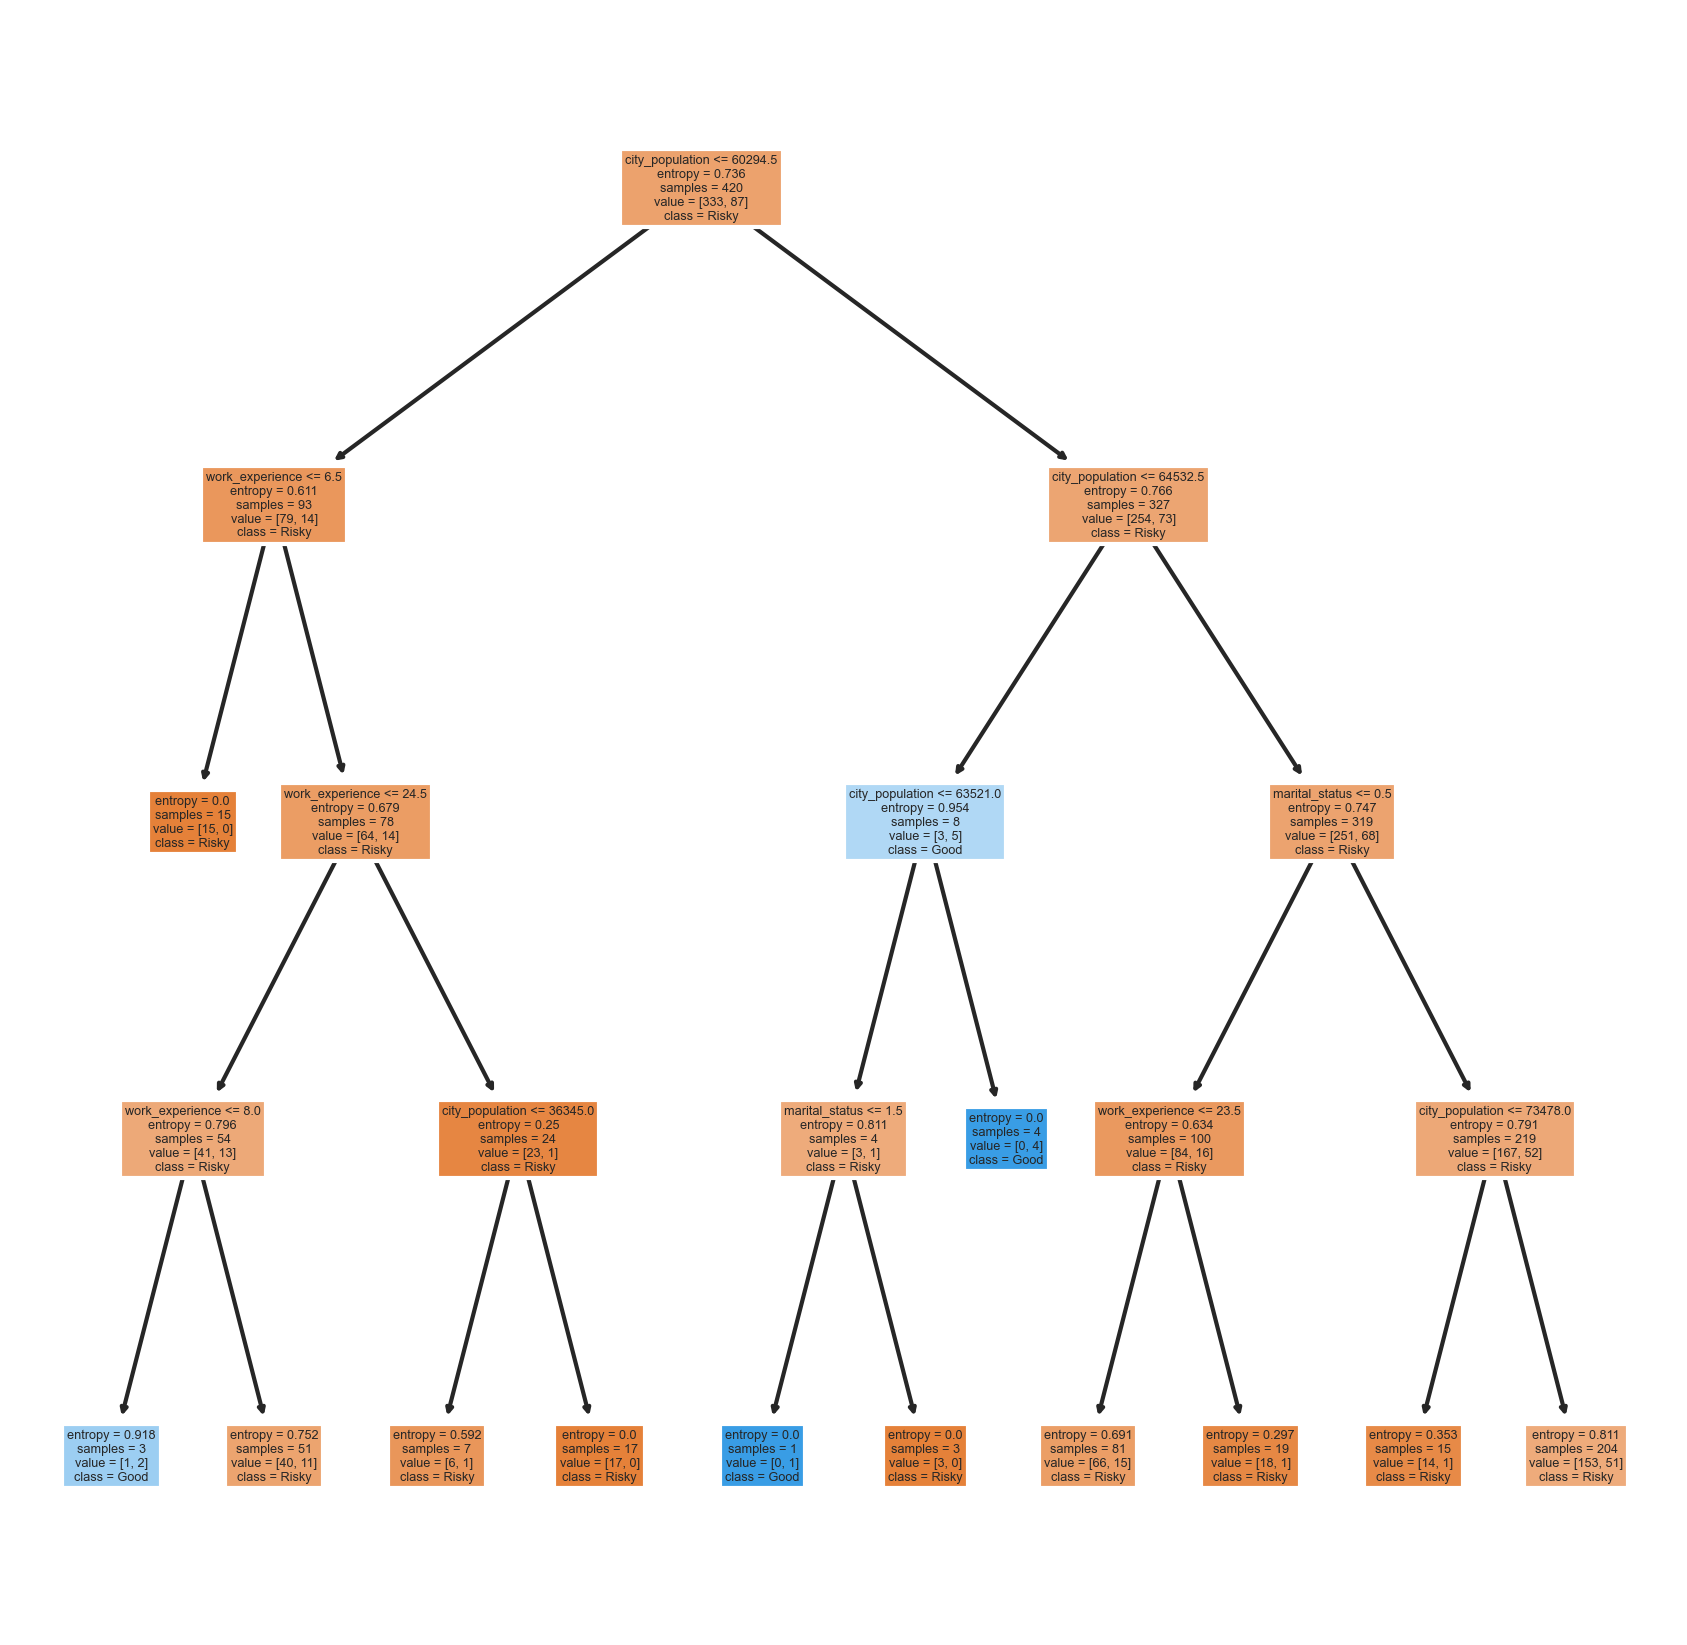

In [27]:
fn=['under_grad', 'marital_status', 'city_population', 'work_experience','urban', 'taxable_category']
cn=['Risky', 'Good']
fig,axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7,7),dpi = 300)
tree.plot_tree(entropy_model,feature_names = fn,class_names = cn, filled = True)
plt.show()

In [28]:
Xtest.value_counts()

Undergrad  Marital.Status  City.Population  Work.Experience  Urban
0          0               27300            1                1        1
1          0               121608           24               0        1
                           139269           29               0        1
                           143153           0                0        1
                           147614           9                1        1
                                                                     ..
0          1               197841           7                0        1
           2               32450            19               1        1
                           34242            12               0        1
                           39360            10               0        1
1          2               186239           25               1        1
Length: 180, dtype: int64

In [29]:
#prediction train data
pred_train_y = entropy_model.predict(Xtrain)
pred_train_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [30]:
#prediction on test data
pred_test_y = entropy_model.predict(Xtest)
pred_test_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [31]:
pd.Series(pred_test_y).value_counts()

0    173
1      7
dtype: int64

In [32]:
#accuracy 
accuracy_score(ytest,pred_test_y)

0.7666666666666667

In [33]:
confusion_matrix(ytest,pred_test_y)

array([[137,   6],
       [ 36,   1]], dtype=int64)

### Using Gini Entropy Criteria

In [34]:
gini_model = DecisionTreeClassifier(criterion = "gini", max_depth = 6)
gini_model.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=6)

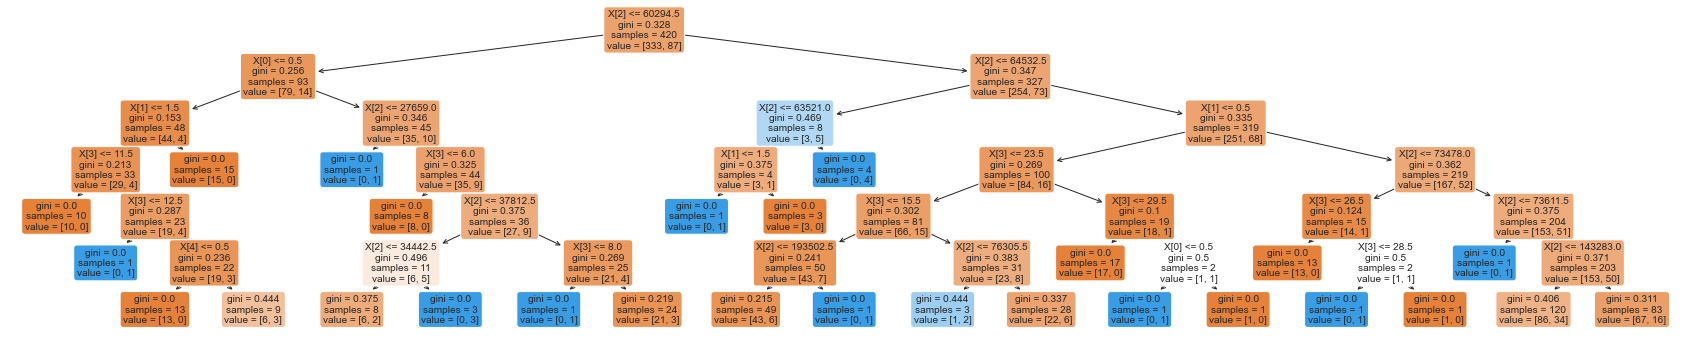

In [35]:
#plotting enropy model decision tree
plt.figure(figsize = (30,6))
from sklearn import tree
tree.plot_tree(gini_model,filled = True,rounded = True)
plt.show()

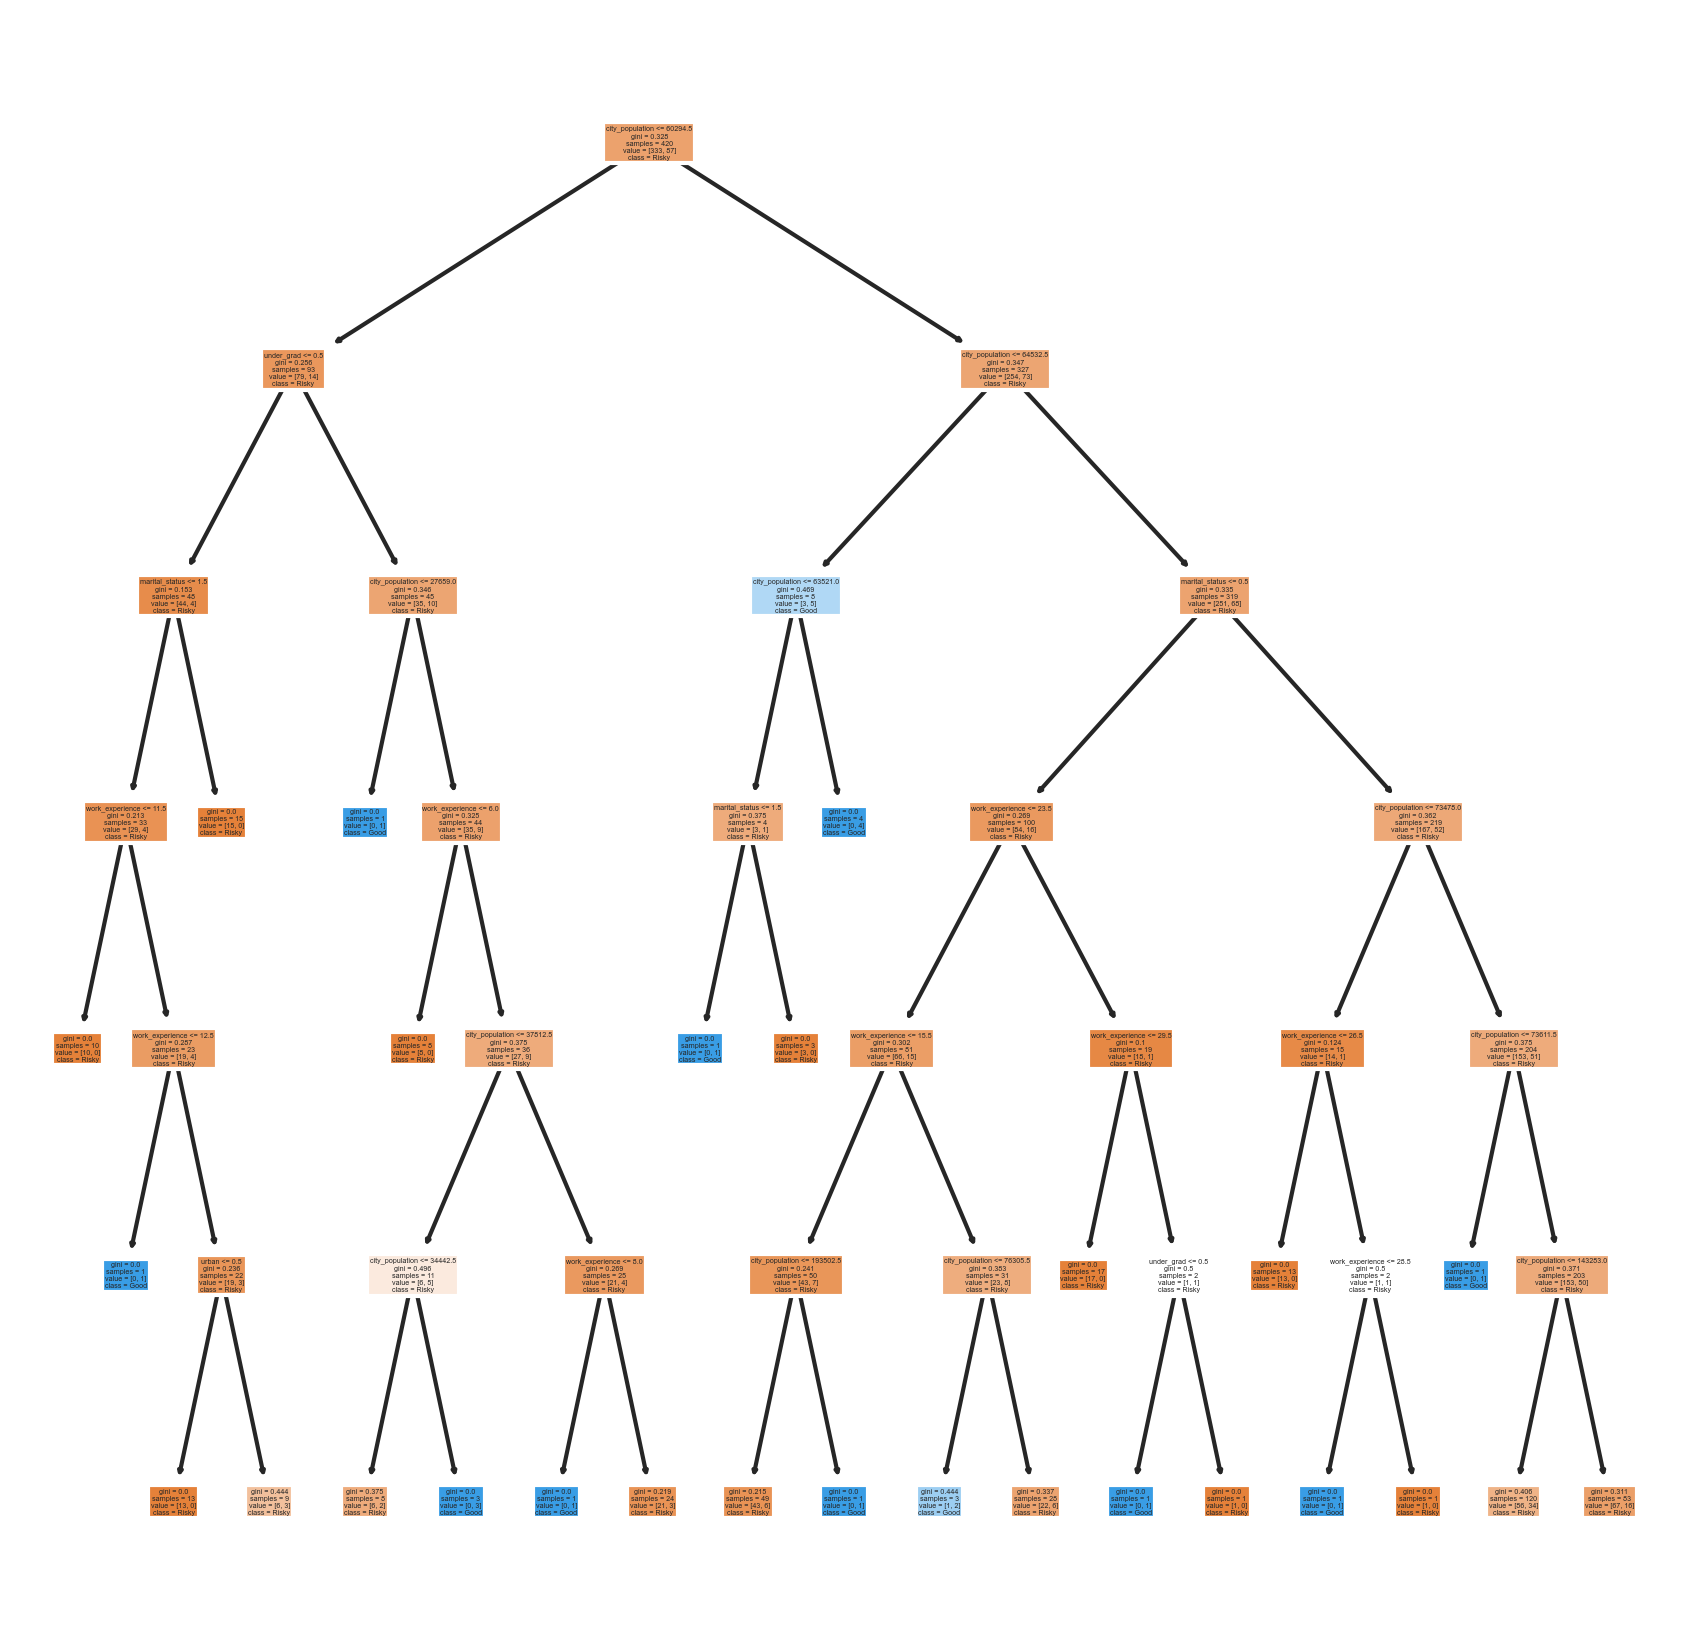

In [36]:
fn=['under_grad', 'marital_status', 'city_population', 'work_experience','urban', 'taxable_category']
cn=['Risky', 'Good']
fig,axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7,7),dpi = 300)
tree.plot_tree(gini_model,feature_names = fn,class_names = cn, filled = True)
plt.show()

In [37]:
#prediction on test data
pred_test_y_gini = gini_model.predict(Xtest)
pred_test_y_gini

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [38]:
pd.Series(pred_test_y_gini).value_counts()

0    167
1     13
dtype: int64

In [39]:
#accuracy 
accuracy_score(ytest,pred_test_y_gini)

0.7666666666666667

In [40]:
confusion_matrix(ytest,pred_test_y_gini)

array([[134,   9],
       [ 33,   4]], dtype=int64)

### Conclusion:

In this case, accuracy for entropy and gini is same.